In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
#dataset present in keras
from keras.datasets import mnist
#sequential is a model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.preprocessing import image

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [0]:
#plotting image
#out of 60000 pick any 1 img,and to be v sure again reshape it
#cmap is mapping scheme,agar ye nahi pass kia to kuch aur color scheme aegi do colors ki,and we want only bw
def plot_img(img):
  plt.imshow(img.reshape(28,28),cmap='gray')

9


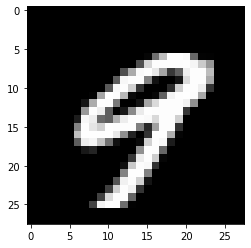

In [20]:
plot_img(x_train[1005])
print(y_train[1005])

In [21]:

x_train[100].shape

(28, 28)

In [23]:
x_train[100].reshape(1,784).shape

(1, 784)

In [0]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [26]:
x_train.shape

(60000, 784)

In [27]:
x_test.shape

(10000, 784)

In [0]:
model=Sequential()
#add 1st hidden layer,ignore input layer
#input shape only for 1st layer
model.add(Dense(units=32,activation='relu', input_shape=(784,)))
#ab input shape ki zarurat ahi,automatically knows 32 neurons hai input shape
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=128,activation='relu' ))
model.add(Dense(units=32,activation='relu' ))
#adding output layer,softmax=>probability
model.add(Dense(units=10,activation='softmax' ))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 40,010
Trainable params: 40,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
#parameters are no.of weights
#optimizer is algo you want to take to update weights-adam,sgd,rmsprop
#loss calculated after getting output,also known as log loss
#metric is what you want to calculate,accuracy here
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [35]:
y_train.shape

(60000,)

In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [38]:
y_train.shape
#10 because unique classes are 10(0-9)

(60000, 10)

In [41]:
y_test.shape

(10000, 10)

In [43]:
#train,batch size kuch bhi hoskta hai,it is no,of images to be passed in one go/iteration
#epoch-how many iterations we wnt to perform
hist=model.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.7110 - accuracy: 0.8412 - val_loss: 0.3007 - val_accuracy: 0.9129
Epoch 2/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.2471 - accuracy: 0.9293 - val_loss: 0.2548 - val_accuracy: 0.9336
Epoch 3/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1951 - accuracy: 0.9439 - val_loss: 0.1864 - val_accuracy: 0.9470
Epoch 4/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.1668 - accuracy: 0.9513 - val_loss: 0.1672 - val_accuracy: 0.9553
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1457 - accuracy: 0.9572 - val_loss: 0.1559 - val_accuracy: 0.9581
Epoch 6/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.1322 - accuracy: 0.9617 - val_loss: 0.1793 - val_accuracy: 0.9568
Epoch 7/10
60000/60000 [==============================] - 3s 54us/st

In [44]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 22us/step


[0.13238426348349314, 0.9663000106811523]

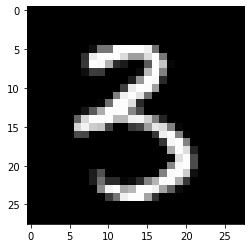

In [45]:
plot_img(x_test[5000])

In [47]:
model.predict(x_test[5000].reshape(1,784))

array([[1.0787114e-13, 5.1738418e-09, 1.2536153e-06, 9.9997950e-01,
        3.9111266e-11, 8.5020088e-07, 7.2163705e-21, 1.5283584e-05,
        3.0610631e-06, 1.3311248e-08]], dtype=float32)

In [0]:
y_pred=model.predict_classes(x_test)

In [49]:
y_pred[5000]

3

In [0]:
#custom image


# img = image.load_img("untitled.png", grayscale=True, target_size=(28,28))
# img = np.array(img)
# img = img.reshape(1, 784)

# prediction = model.predict_classes(img)